In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Only get data analyst jobs in the US


In [3]:
import seaborn as sns

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

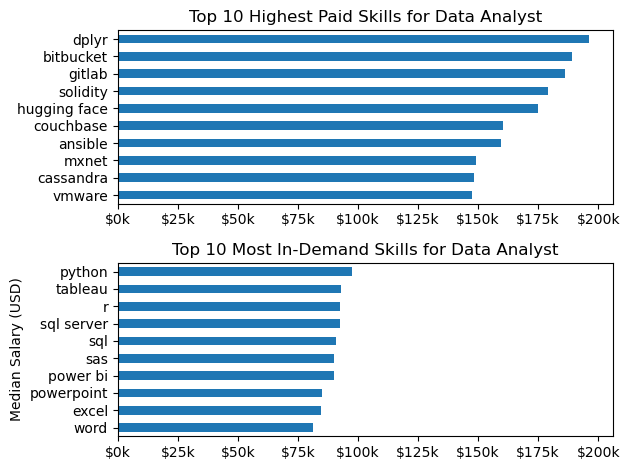

In [4]:
df_DA_US=df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_top_skill = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)


fig, ax =plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


df_DA_top_skill[::-1].plot(kind='barh',y='median', ax=ax[1],legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
fig.tight_layout()

In [7]:
df_DA_US=df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_top_skill = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)




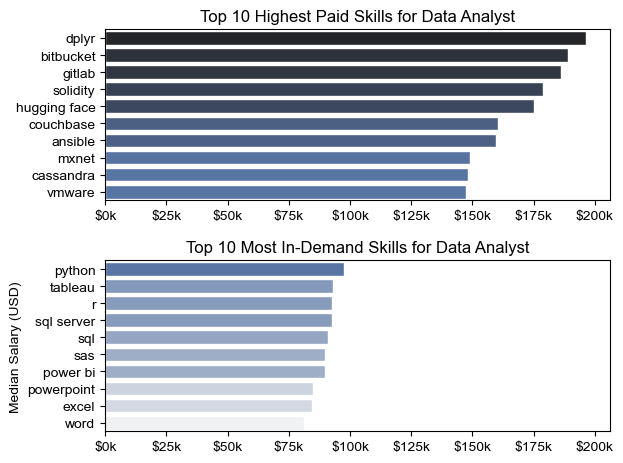

In [16]:
fig, ax =plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, y=df_DA_top_pay.index, x = 'median' , ax=ax[0], hue='median', palette='dark:b_r')
# df_DA_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0],legend=False)
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


# df_DA_top_skill[::-1].plot(kind='barh',y='median', ax=ax[1],legend=False)
sns.barplot(data=df_DA_top_skill, x = 'median', y=df_DA_top_skill.index , ax=ax[1], hue = 'median',palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
fig.tight_layout()

Text(12.444444444444445, 0.5, 'Number of Jobs')

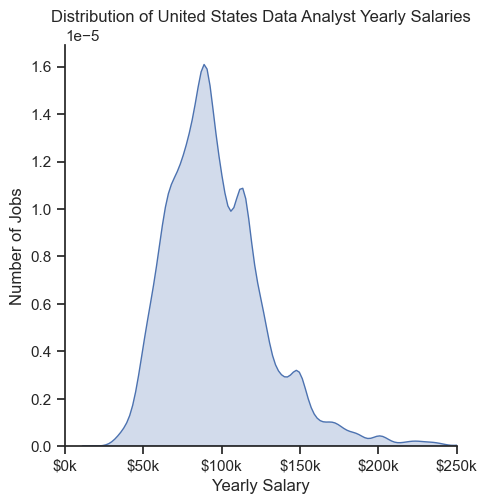

In [21]:
sns.displot(df_DA_US['salary_year_avg'] ,kind='kde',fill=True) 
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')  

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

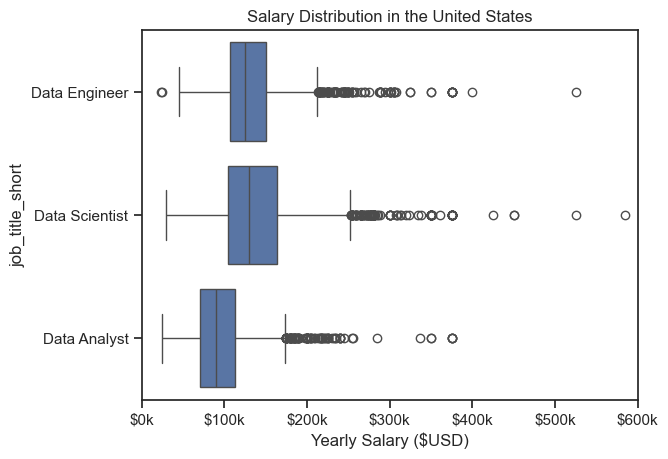

In [28]:
sns.boxplot(data=df_US,x='salary_year_avg', y='job_title_short')

# plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel=('')
plt.xlim(0,600000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.show()